# 프로젝트 시작
`프로젝트 3` 한국 부동산 시장 분석 및 투자 전략 수립
- https://rt.molit.go.kr/pt/xls/xls.do?mobileAt=


`세부과제`
1. 수도권 vs 지방 (or 서울 인기구 vs 비인기구) 부동산 시장 비교 분석
수도권(서울, 경기, 인천)과 주요 지방 광역시의 부동산 가격 변동 패턴을 비교 분석하고, 지역별 시장 특성과 투자 매력도를 평가하세요.
2. 아파트 규모별 가격 트렌드 및 생애주기 투자 전략
전용면적별(소형, 중형, 대형) 아파트의 가격 변동 추이를 분석하고, 생애주기에 따른 최적 투자 전략과 거주 전략을 데이터 기반으로 제시하세요.
3. 부동산 거래량과 가격의 선행지표 관계 분석
부동산 거래량 변화가 가격 변동에 미치는 영향을 시차 분석을 통해 파악하고, 시장 전환점을 예측할 수 있는 지표를 개발하세요.

`자유 주제`

한국 부동산 시장의 구조적 특성을 고려한 새로운 분석 관점에서 투자자나 정책 입안자에게 도움이 될 수 있는 인사이트를 자유롭게 도출하세요. 

> #### 라이브러리 설치

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from scipy.spatial import distance
from scipy.stats import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

import warnings
warnings.filterwarnings('ignore', category=UserWarning)

plt.rcParams['font.family'] = 'Gmarket Sans'
plt.rcParams['axes.unicode_minus'] = False

import sys
sys.path.append('/Users/jun-seokoh/Desktop/TIL/data analysis')

from da_utils import profile, outliers, pattern

In [2]:
df = pd.read_csv('./apartment_0813.csv', encoding='EUC KR')
display(df.head())
df.info()


/var/folders/tx/t7px7cn503bgk6zlg3m0b4740000gn/T/ipykernel_11199/2063089208.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./apartment_0813.csv', encoding='EUC KR')


,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,...,월세금(만원),층,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원),주택유형
0,1,서울특별시 강동구 길동,400,400,0,길동우성,전세,57.10,202508,12,...,0,3,1994,천호대로193길 37,202509~202709,신규,-,NaN,NaN,아파트
1,2,서울특별시 강동구 둔촌동,611,611,0,한솔솔파크,전세,67.24,202508,12,...,0,4,2003,천호대로198길 36,202510~202710,신규,-,NaN,NaN,아파트
2,3,서울특별시 강동구 길동,368-7,368,7,길동생활B,월세,33.85,202508,12,...,54,9,2024,양재대로 1501,202509~202709,신규,-,NaN,NaN,아파트
3,4,서울특별시 강동구 암사동,400,400,0,현대홈타운,전세,84.98,202508,12,...,0,7,2004,고덕로27길 36,202508~202708,신규,-,NaN,NaN,아파트
4,5,서울특별시 강동구 암사동,414-2,414,2,롯데캐슬퍼스트,월세,84.98,202508,12,...,100,21,2008,고덕로 131,202508~202708,갱신,-,"50,000",60,아파트


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251252 entries, 0 to 251251
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   NO            251252 non-null  int64  
 1   시군구           251252 non-null  object 
 2   번지            251252 non-null  object 
 3   본번            251252 non-null  int64  
 4   부번            251252 non-null  int64  
 5   단지명           251252 non-null  object 
 6   전월세구분         251252 non-null  object 
 7   전용면적(㎡)       251252 non-null  float64
 8   계약년월          251252 non-null  int64  
 9   계약일           251252 non-null  int64  
 10  보증금(만원)       251252 non-null  object 
 11  월세금(만원)       251252 non-null  object 
 12  층             251252 non-null  int64  
 13  건축년도          251252 non-null  int64  
 14  도로명           251252 non-null  object 
 15  계약기간          251252 non-null  object 
 16  계약구분          251252 non-null  object 
 17  갱신요구권 사용      251252 non-null  object 
 18  종전계약

In [3]:
profile.get_data_profile(df)

종합 데이터 품질 리포트

1. 기본정보
- 데이터 크기: 251252행 x 21열
- 메모리 사용량: 210.77mb
- 수치형 변수: 8개
- 범주형 변수: 13개

2. 결측값 분석


,결측수,결측율(%)
종전계약 보증금(만원),163644,65.13
종전계약 월세(만원),163644,65.13



3. 수치형 변수 품질 분석


,변수명,평균,표준편차,최솟값,최댓값,왜도,첨도,이상값비율(%),유일값비율(%)
0,NO,125626.500,72530.349,1.000,251252.00,0.000,-1.200,0.000,100.000
1,본번,613.715,609.824,0.000,4975.00,3.389,19.835,2.698,0.613
2,부번,4.929,38.652,0.000,2796.00,36.977,2094.966,24.241,0.103
3,전용면적(㎡),68.451,29.220,10.322,317.36,0.744,2.122,2.049,4.354
4,계약년월,202469.696,45.185,202408.000,202508.00,-0.554,-1.686,0.000,0.005
5,계약일,16.016,8.498,1.000,31.00,-0.002,-1.118,0.000,0.012
6,층,9.765,6.532,-4.000,69.00,1.156,2.160,2.554,0.027
7,건축년도,2005.584,12.726,1961.000,2025.00,-0.301,-0.915,0.003,0.025



4. 분포 이상 감지

- 극심한 왜도(|skewness| > 2)
--본번: 왜도 =  3.389000
--부번: 왜도 =  36.977000

- 높은 이상값 비율(>5%)
['부번']
--부번: 이상값 = 24.2%


,변수명,평균,표준편차,최솟값,최댓값,왜도,첨도,이상값비율(%),유일값비율(%)
0,NO,125626.500,72530.349,1.000,251252.00,0.000,-1.200,0.000,100.000
1,본번,613.715,609.824,0.000,4975.00,3.389,19.835,2.698,0.613
2,부번,4.929,38.652,0.000,2796.00,36.977,2094.966,24.241,0.103
3,전용면적(㎡),68.451,29.220,10.322,317.36,0.744,2.122,2.049,4.354
4,계약년월,202469.696,45.185,202408.000,202508.00,-0.554,-1.686,0.000,0.005
5,계약일,16.016,8.498,1.000,31.00,-0.002,-1.118,0.000,0.012
6,층,9.765,6.532,-4.000,69.00,1.156,2.160,2.554,0.027
7,건축년도,2005.584,12.726,1961.000,2025.00,-0.301,-0.915,0.003,0.025


In [4]:
outliers.outlier_detection(df)

결측치 확인. 제거 후 다시 시도하세요.


=== 결측값 패턴 분석 ===
변수별 결측 현황


,결측수,결측률(%)
종전계약 보증금(만원),163644,65.13
종전계약 월세(만원),163644,65.13


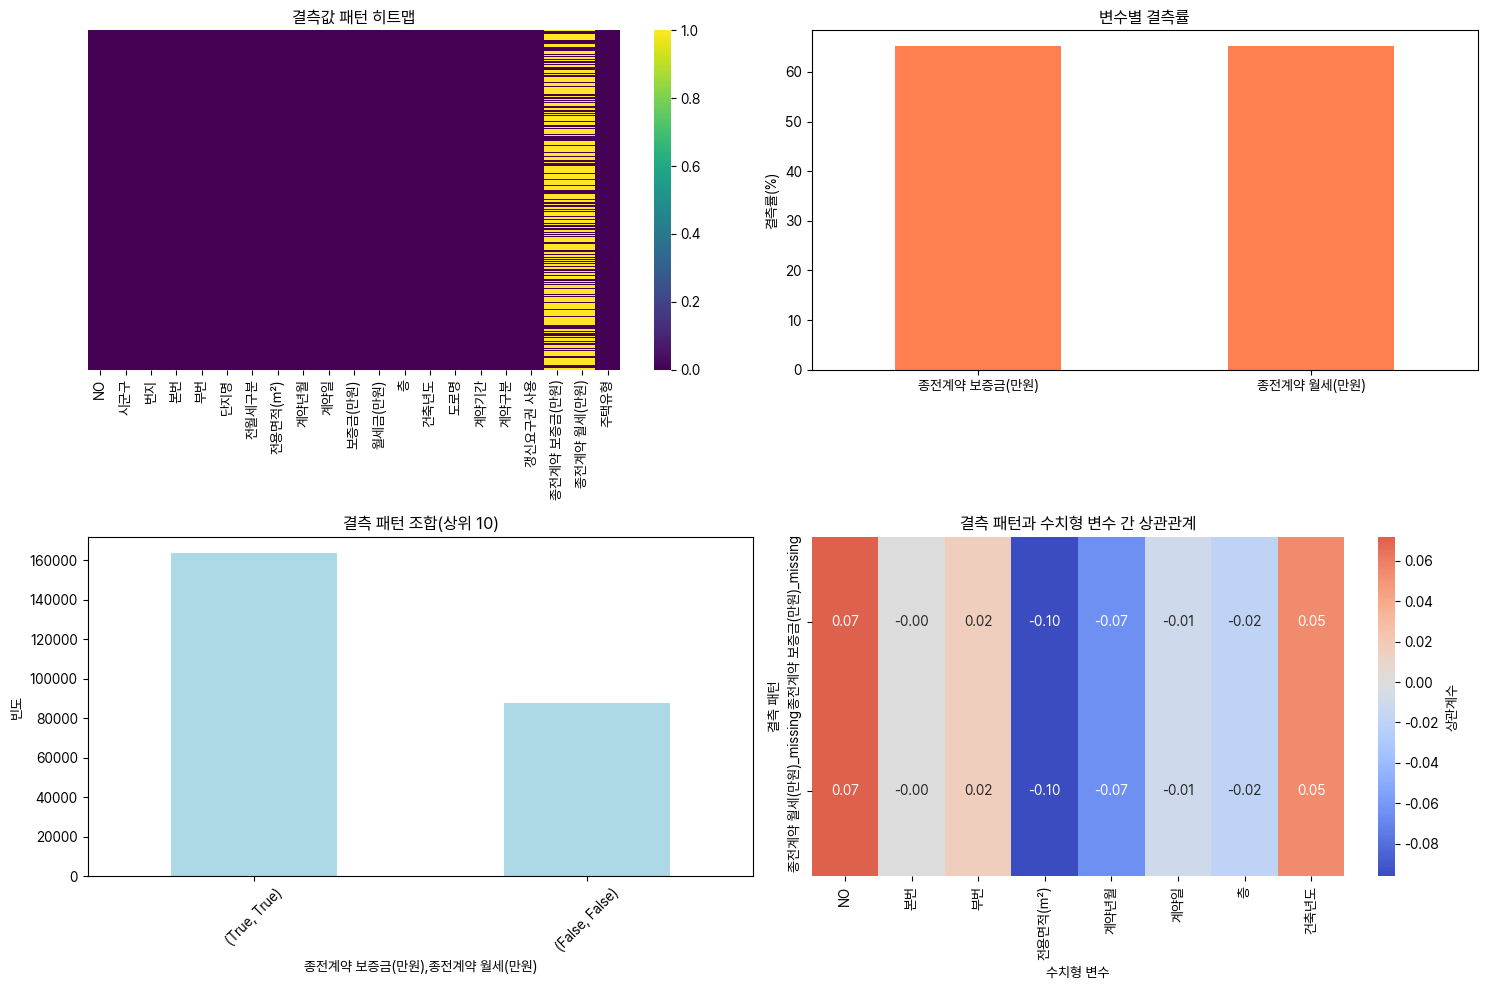

,결측수,결측률(%)
종전계약 보증금(만원),163644,65.13
종전계약 월세(만원),163644,65.13


In [5]:
pattern.analyze_missing_patterns(df)

# 데이터 전처리 진행
- 본번-부번을 삭제
- 번지수를 string으로 변환
- 종전계약 있는 데이터를 따로 구분.
- 계약년월 datetime으로 변환
- m당 가격 컬럼 추가

In [6]:
# 복사본 만들기
df_c = df.copy()

# '-' 값 None으로 바꾸기.
df_c = df_c.replace('-', pd.NA) 

# 1. 본번, 부번 삭제
df_c = df_c.drop(columns=["본번", "부번"])

# 2. 번지수 string 변환
df_c["번지"] = df_c["번지"].astype(str)

# 3. 종전계약 flag 만들고 기존 컬럼 정리
# df_c["is_old_contract"] = df["종전계약 보증금(만원)"].notnull()
# 필요하다면 두 개 컬럼은 삭제
df_c = df_c.drop(columns=["종전계약 보증금(만원)", "종전계약 월세(만원)"])

# 4. 계약년월 datetime 변환
df_c["계약년월"] = pd.to_datetime(df["계약년월"], format="%Y%m")

# 5. 보증금, 월세금 int화
# df_c['보증금(만원)'] = 
df_c['보증금(만원)'] = df_c['보증금(만원)'].str.replace(',','')
df_c['보증금(만원)'] = df_c["보증금(만원)"].astype(int)
df_c['월세금(만원)'] = df_c['월세금(만원)'].str.replace(',','')
df_c['월세금(만원)'] = df_c["월세금(만원)"].astype(int)

# 5. ㎡당 가격 컬럼 추가
df_c["㎡당가격"] = (df_c["보증금(만원)"].astype(float) / df_c["전용면적(㎡)"]).round(2)

print(df_c.info())
display(df_c.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251252 entries, 0 to 251251
Data columns (total 18 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   NO        251252 non-null  int64         
 1   시군구       251252 non-null  object        
 2   번지        251252 non-null  object        
 3   단지명       251252 non-null  object        
 4   전월세구분     251252 non-null  object        
 5   전용면적(㎡)   251252 non-null  float64       
 6   계약년월      251252 non-null  datetime64[ns]
 7   계약일       251252 non-null  int64         
 8   보증금(만원)   251252 non-null  int64         
 9   월세금(만원)   251252 non-null  int64         
 10  층         251252 non-null  int64         
 11  건축년도      251252 non-null  int64         
 12  도로명       251252 non-null  object        
 13  계약기간      232374 non-null  object        
 14  계약구분      231967 non-null  object        
 15  갱신요구권 사용  40539 non-null   object        
 16  주택유형      251252 non-null  object     

,NO,시군구,번지,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세금(만원),층,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,주택유형,㎡당가격
0,1,서울특별시 강동구 길동,400,길동우성,전세,57.10,2025-08-01,12,43000,0,3,1994,천호대로193길 37,202509~202709,신규,<NA>,아파트,753.06
1,2,서울특별시 강동구 둔촌동,611,한솔솔파크,전세,67.24,2025-08-01,12,52000,0,4,2003,천호대로198길 36,202510~202710,신규,<NA>,아파트,773.35
2,3,서울특별시 강동구 길동,368-7,길동생활B,월세,33.85,2025-08-01,12,9000,54,9,2024,양재대로 1501,202509~202709,신규,<NA>,아파트,265.88
3,4,서울특별시 강동구 암사동,400,현대홈타운,전세,84.98,2025-08-01,12,60000,0,7,2004,고덕로27길 36,202508~202708,신규,<NA>,아파트,706.05
4,5,서울특별시 강동구 암사동,414-2,롯데캐슬퍼스트,월세,84.98,2025-08-01,12,50000,100,21,2008,고덕로 131,202508~202708,갱신,<NA>,아파트,588.37


In [7]:
# 계약구분에 따른 테이블 분류


df_c.drop(columns=['갱신요구권 사용', '계약구분'])


# 2) 시작/종료 분리
df_c[["계약시작", "계약종료"]] = df_c["계약기간"].str.split("~", expand=True)

# 3) datetime 변환
df_c["계약시작"] = pd.to_datetime(df_c["계약시작"], format="%Y%m", errors="coerce")
df_c["계약종료"] = pd.to_datetime(df_c["계약종료"], format="%Y%m", errors="coerce")

# 4) 계약기간 (월 단위 int)
df_c["계약기간"] = (
    (df_c["계약종료"].dt.year - df_c["계약시작"].dt.year) * 12
    + (df_c["계약종료"].dt.month - df_c["계약시작"].dt.month)
).astype('Int64')

In [8]:
df_c = df_c.drop(columns='갱신요구권 사용')

In [9]:

mask = df_c["계약시작"].notna() & df_c["계약종료"].isna()
# no.33697, 185211, 204459, : 종료일 년도 오타.
# 이러면 그냥 하나씩 수정하는 게 맞나?

from pandas.tseries.offsets import DateOffset





df_c.iloc[33696, df_c.columns.get_loc("계약종료")] = "202708"
df_c.iloc[185210, df_c.columns.get_loc("계약종료")] = "202612"
df_c.iloc[204458, df_c.columns.get_loc("계약종료")] = "202611"

df_c["계약종료"] = pd.to_datetime(df_c["계약종료"], format="%Y%m", errors="coerce")

df_c["계약기간"] = (
    (df_c["계약종료"].dt.year - df_c["계약시작"].dt.year) * 12
    + (df_c["계약종료"].dt.month - df_c["계약시작"].dt.month)
).astype("Int64")

df_c



/var/folders/tx/t7px7cn503bgk6zlg3m0b4740000gn/T/ipykernel_11199/233867558.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '202708' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df_c.iloc[33696, df_c.columns.get_loc("계약종료")] = "202708"


,NO,시군구,번지,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세금(만원),층,건축년도,도로명,계약기간,계약구분,주택유형,㎡당가격,계약시작,계약종료
0,1,서울특별시 강동구 길동,400,길동우성,전세,57.100,2025-08-01,12,43000,0,3,1994,천호대로193길 37,24,신규,아파트,753.06,2025-09-01,2027-09-01
1,2,서울특별시 강동구 둔촌동,611,한솔솔파크,전세,67.240,2025-08-01,12,52000,0,4,2003,천호대로198길 36,24,신규,아파트,773.35,2025-10-01,2027-10-01
2,3,서울특별시 강동구 길동,368-7,길동생활B,월세,33.850,2025-08-01,12,9000,54,9,2024,양재대로 1501,24,신규,아파트,265.88,2025-09-01,2027-09-01
3,4,서울특별시 강동구 암사동,400,현대홈타운,전세,84.980,2025-08-01,12,60000,0,7,2004,고덕로27길 36,24,신규,아파트,706.05,2025-08-01,2027-08-01
4,5,서울특별시 강동구 암사동,414-2,롯데캐슬퍼스트,월세,84.980,2025-08-01,12,50000,100,21,2008,고덕로 131,24,갱신,아파트,588.37,2025-08-01,2027-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251247,251248,서울특별시 서초구 서초동,1757,서초그랑자이,월세,59.990,2024-08-01,14,60000,240,28,2021,효령로 391,24,신규,아파트,1000.17,2024-09-01,2026-09-01
251248,251249,서울특별시 서초구 서초동,1682,서초래미안,전세,111.320,2024-08-01,14,120000,0,10,2003,서초대로65길 13-10,24,신규,아파트,1077.97,2024-10-01,2026-10-01
251249,251250,서울특별시 서초구 서초동,1511-3,N-Suite102동(1511-3),월세,120.560,2024-08-01,14,74000,50,1,2004,명달로22길 64,24,갱신,아파트,613.80,2024-08-01,2026-08-01
251250,251251,서울특별시 서초구 반포동,30-26,반포리체,전세,59.994,2024-08-01,14,115000,0,10,2010,고무래로 35,24,신규,아파트,1916.86,2024-08-01,2026-08-01


In [10]:
profile.get_data_profile(df_c)

종합 데이터 품질 리포트

1. 기본정보
- 데이터 크기: 251252행 x 19열
- 메모리 사용량: 147.52mb
- 수치형 변수: 9개
- 범주형 변수: 7개

2. 결측값 분석


,결측수,결측율(%)
계약기간,18878,7.51
계약구분,19285,7.68
계약시작,18878,7.51
계약종료,18878,7.51



3. 수치형 변수 품질 분석


,변수명,평균,표준편차,최솟값,최댓값,왜도,첨도,이상값비율(%),유일값비율(%)
0,NO,125626.500,72530.349,1.000,251252.00,0.000,-1.200,0.000,100.000
1,전용면적(㎡),68.451,29.220,10.322,317.36,0.744,2.122,2.049,4.354
2,계약일,16.016,8.498,1.000,31.00,-0.002,-1.118,0.000,0.012
3,보증금(만원),42640.937,37843.061,0.000,1000000.00,2.512,20.087,2.661,4.233
4,월세금(만원),47.713,98.905,0.000,4000.00,6.057,94.590,9.996,0.258
5,층,9.765,6.532,-4.000,69.00,1.156,2.160,2.554,0.027
6,건축년도,2005.584,12.726,1961.000,2025.00,-0.301,-0.915,0.003,0.025
7,계약기간,23.150,4.465,0.000,540.00,12.837,1167.785,17.322,0.034
8,㎡당가격,583.409,400.406,0.000,4613.02,0.973,1.921,1.902,26.743



4. 분포 이상 감지

- 극심한 왜도(|skewness| > 2)
--보증금(만원): 왜도 =  2.512000
--월세금(만원): 왜도 =  6.057000
--계약기간: 왜도 =  12.837000

- 높은 이상값 비율(>5%)
['월세금(만원)', '계약기간']
--월세금(만원): 이상값 = 10.0%
--계약기간: 이상값 = 17.3%


,변수명,평균,표준편차,최솟값,최댓값,왜도,첨도,이상값비율(%),유일값비율(%)
0,NO,125626.500,72530.349,1.000,251252.00,0.000,-1.200,0.000,100.000
1,전용면적(㎡),68.451,29.220,10.322,317.36,0.744,2.122,2.049,4.354
2,계약일,16.016,8.498,1.000,31.00,-0.002,-1.118,0.000,0.012
3,보증금(만원),42640.937,37843.061,0.000,1000000.00,2.512,20.087,2.661,4.233
4,월세금(만원),47.713,98.905,0.000,4000.00,6.057,94.590,9.996,0.258
5,층,9.765,6.532,-4.000,69.00,1.156,2.160,2.554,0.027
6,건축년도,2005.584,12.726,1961.000,2025.00,-0.301,-0.915,0.003,0.025
7,계약기간,23.150,4.465,0.000,540.00,12.837,1167.785,17.322,0.034
8,㎡당가격,583.409,400.406,0.000,4613.02,0.973,1.921,1.902,26.743


In [11]:
df_c[df_c['계약기간']==12].count() # 12:10993
df_c[df_c['계약기간']==24].count() # 24:192123
df_c[df_c['계약기간'].isna()].count() # 18878
df_c = df_c.dropna(subset=["계약기간"]).reset_index(drop=True)
df_c = df_c.drop(columns=['계약기간', '계약시작', '계약종료'])
df_c

,NO,시군구,번지,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세금(만원),층,건축년도,도로명,계약구분,주택유형,㎡당가격
0,1,서울특별시 강동구 길동,400,길동우성,전세,57.100,2025-08-01,12,43000,0,3,1994,천호대로193길 37,신규,아파트,753.06
1,2,서울특별시 강동구 둔촌동,611,한솔솔파크,전세,67.240,2025-08-01,12,52000,0,4,2003,천호대로198길 36,신규,아파트,773.35
2,3,서울특별시 강동구 길동,368-7,길동생활B,월세,33.850,2025-08-01,12,9000,54,9,2024,양재대로 1501,신규,아파트,265.88
3,4,서울특별시 강동구 암사동,400,현대홈타운,전세,84.980,2025-08-01,12,60000,0,7,2004,고덕로27길 36,신규,아파트,706.05
4,5,서울특별시 강동구 암사동,414-2,롯데캐슬퍼스트,월세,84.980,2025-08-01,12,50000,100,21,2008,고덕로 131,갱신,아파트,588.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232369,251248,서울특별시 서초구 서초동,1757,서초그랑자이,월세,59.990,2024-08-01,14,60000,240,28,2021,효령로 391,신규,아파트,1000.17
232370,251249,서울특별시 서초구 서초동,1682,서초래미안,전세,111.320,2024-08-01,14,120000,0,10,2003,서초대로65길 13-10,신규,아파트,1077.97
232371,251250,서울특별시 서초구 서초동,1511-3,N-Suite102동(1511-3),월세,120.560,2024-08-01,14,74000,50,1,2004,명달로22길 64,갱신,아파트,613.80
232372,251251,서울특별시 서초구 반포동,30-26,반포리체,전세,59.994,2024-08-01,14,115000,0,10,2010,고무래로 35,신규,아파트,1916.86


#### 시군구 나누기

In [12]:
import matplotlib.dates as mdates

# df_c = df_c.drop(columns=['시', '구', '동'])
df_c[["시", "구", '동']] = df_c["시군구"].str.split(" ", expand=True)
df_c.groupby(['전월세구분', '계약구분']).size().unstack()
m_new = df_c['계약구분']=='신규'
df_new = df_c[m_new]
df_J_new = df_new[df_new['전월세구분']=='전세']
J_summary = df_J_new.groupby(['계약년월', '구']).agg({
    '보증금(만원)': ['mean'],
})
J_summary.unstack()


보증금(만원)                                            \
                     mean                                             
구                     강남구           강동구           강북구           강서구   
계약년월                                                                  
2024-08-01   95231.485876  56843.714801  40676.923077  47755.698795   
2024-09-01   90826.989305  58120.783934  41847.250000  46761.111486   
2024-10-01   99244.169877  60963.398291  38100.000000  47974.269430   
2024-11-01   98900.347490  61817.996683  39868.571429  48487.101370   
2024-12-01  102242.037338  68939.009929  39480.129870  50969.237179   
2025-01-01   88337.101415  63944.781651  36872.619048  46737.507740   
2025-02-01   93936.409465  58769.947248  37290.072165  46372.569975   
2025-03-01   96572.486486  59921.646245  39874.857143  48642.650667   
2025-04-01   91215.641975  59106.710145  39388.703704  46465.242958   
2025-05-01   96834.553398  58455.126935  36692.771084  48002.579125   
2025-06-01  100295.873563  60006.912329  39565.384615  48092.633663   
2025-07-01   89883.949405  59465.881226  39496.610169  49898.543568   
2025-08-01   89919.450980  62516.095238  47266.666667  51921.327869   

                                                                    \
                                                                     
구                    관악구           광진구           구로구           금천구   
계약년월                                                                 
2024-08-01  50397.300000  72311.595745  39761.932515  37251.745455   
2024-09-01  47644.909091  69431.184783  37958.122340  36173.445946   
2024-10-01  49352.392638  67545.408163  39589.023256  39160.060606   
2024-11-01  48563.627586  64227.430556  40368.211823  36399.887640   
2024-12-01  46378.465839  67640.515528  40621.367876  38525.604396   
2025-01-01  45405.069444  64568.621212  37715.642458  36481.805556   
2025-02-01  46518.434389  64326.166667  40674.792952  35790.297619   
2025-03-01  48199.438914  73032.267442  40502.337165  35905.620370   
2025-04-01  48709.415584  73657.907609  37823.352381  36787.681818   
2025-05-01  47823.024691  75774.489796  39617.578475  37537.804878   
2025-06-01  50496.575000  80189.637306  41832.439560  40044.120000   
2025-07-01  46912.514493  76722.777778  41114.584337  36148.666667   
2025-08-01  46500.000000  76683.941176  44256.292683  34626.315789   

                                        ...                              \
                                        ...                               
구                    노원구           도봉구  ...           성동구           성북구   
계약년월                                    ...                               
2024-08-01  32932.399433  32060.514706  ...  70314.733696  50614.575758   
2024-09-01  31595.655963  29140.885350  ...  74573.703390  51187.758454   
2024-10-01  32913.674766  29952.000000  ...  73984.536082  49534.957895   
2024-11-01  33334.118126  29483.382353  ...  72419.802632  50351.662602   
2024-12-01  34376.586826  30724.769231  ...  69322.325397  51814.097458   
2025-01-01  31623.576310  29568.523490  ...  74571.568266  49446.891386   
2025-02-01  31872.996296  30345.544041  ...  74134.054054  48610.196078   
2025-03-01  31876.430508  31278.431373  ...  78300.795337  48664.093248   
2025-04-01  31132.047809  30808.653846  ...  73291.254355  49048.831967   
2025-05-01  32085.398249  31358.765432  ...  71955.940594  50628.549242   
2025-06-01  33200.022075  31896.486486  ...  75386.345029  50913.442231   
2025-07-01  33603.888889  44587.525253  ...  71907.214008  51783.167421   
2025-08-01  32231.549296  69773.387097  ...  74381.560000  50989.652174   

                                                                     \
                                                                      
구                    송파구           양천구          영등포구            용산구   
계약년월                                                                  
2024-08-01  73937.223404  60077.511962  58199.173913   7944

지역구분
기타      177104
강남3구     55270
Name: count, dtype: int64


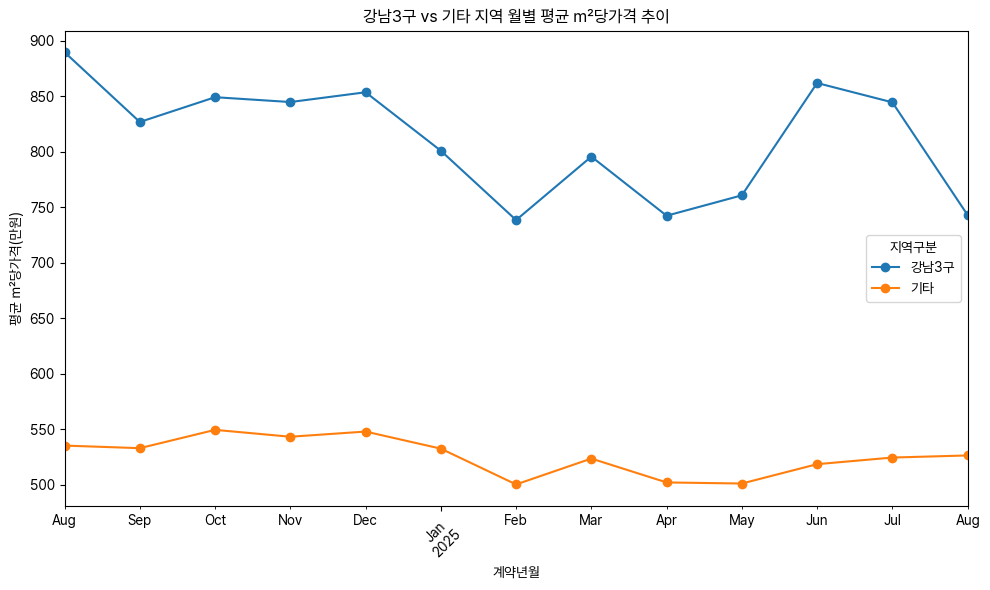

In [13]:
# 강남3구 리스트
gangnam3 = ["강남구", "서초구", "송파구"]

# 새 컬럼 추가
df_c["지역구분"] = df_c["구"].apply(lambda x: "강남3구" if x in gangnam3 else "기타")

# 확인
print(df_c["지역구분"].value_counts())

# 1) 월단위 강남3구 vs 기타 평균
g = (df_c.groupby(['계약년월','지역구분'])['㎡당가격']
         .mean()
         .rename('평균평당가')
         .reset_index())

# 2) 피벗 (계약년월 = 행, 지역구분 = 열)
g_pivot = g.pivot(index='계약년월', columns='지역구분', values='평균평당가').sort_index()

# 3) 시각화
ax = g_pivot.plot(figsize=(10,6), marker='o')
ax.set_title("강남3구 vs 기타 지역 월별 평균 ㎡당가격 추이")
ax.set_xlabel("계약년월"); ax.set_ylabel("평균 ㎡당가격(만원)")
# ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
df_c = df_c.dropna(subset='계약구분')
profile.get_data_profile(df_c)

종합 데이터 품질 리포트

1. 기본정보
- 데이터 크기: 222782행 x 20열
- 메모리 사용량: 193.18mb
- 수치형 변수: 8개
- 범주형 변수: 11개

2. 결측값 분석
결측값 없음. 완전

3. 수치형 변수 품질 분석


,변수명,평균,표준편차,최솟값,최댓값,왜도,첨도,이상값비율(%),유일값비율(%)
0,NO,124351.477,72809.012,1.000,251252.00,0.015,-1.219,0.000,100.000
1,전용면적(㎡),69.907,29.820,10.322,317.36,0.675,2.014,3.081,4.864
2,계약일,16.088,8.624,1.000,31.00,-0.017,-1.158,0.000,0.014
3,보증금(만원),44813.245,38648.520,0.000,1000000.00,2.510,20.210,2.695,3.222
4,월세금(만원),51.044,102.929,0.000,4000.00,5.754,85.614,8.639,0.291
5,층,9.865,6.608,-2.000,69.00,1.159,2.181,1.804,0.031
6,건축년도,2004.951,12.843,1961.000,2025.00,-0.223,-0.947,0.003,0.028
7,㎡당가격,606.470,403.915,0.000,4613.02,0.929,1.901,2.251,28.557



4. 분포 이상 감지

- 극심한 왜도(|skewness| > 2)
--보증금(만원): 왜도 =  2.510000
--월세금(만원): 왜도 =  5.754000

- 높은 이상값 비율(>5%)
['월세금(만원)']
--월세금(만원): 이상값 = 8.6%


,변수명,평균,표준편차,최솟값,최댓값,왜도,첨도,이상값비율(%),유일값비율(%)
0,NO,124351.477,72809.012,1.000,251252.00,0.015,-1.219,0.000,100.000
1,전용면적(㎡),69.907,29.820,10.322,317.36,0.675,2.014,3.081,4.864
2,계약일,16.088,8.624,1.000,31.00,-0.017,-1.158,0.000,0.014
3,보증금(만원),44813.245,38648.520,0.000,1000000.00,2.510,20.210,2.695,3.222
4,월세금(만원),51.044,102.929,0.000,4000.00,5.754,85.614,8.639,0.291
5,층,9.865,6.608,-2.000,69.00,1.159,2.181,1.804,0.031
6,건축년도,2004.951,12.843,1961.000,2025.00,-0.223,-0.947,0.003,0.028
7,㎡당가격,606.470,403.915,0.000,4613.02,0.929,1.901,2.251,28.557


In [24]:
outliers_summary, final_outliers = outliers.outlier_detection(df_c)
outliers_apt = df_c[final_outliers]
normal_apt = df_c[~final_outliers]


=== 종합 이상값 탐지 시스템 ===
1. 일변량 이상값 탐지 (IQR 방법)
  전용면적(㎡): 6865개 (3.1%)
  보증금(만원): 6005개 (2.7%)
  월세금(만원): 19246개 (8.6%)
  층: 4019개 (1.8%)
  건축년도: 7개 (0.0%)
  평당가: 5014개 (2.3%)

2. 다변량 이상값 탐지 (마할라노비스 거리)
 임계값(거리): 5.11
 다변량 이상값: 4521개 (2.0%)

3. 다변량 이상값 탐지(Isolation Forest)
  Isolation Forest 이상값: 22279개 (10.0%)

 == 최종 이상값: 17443개 (7.8%)


### 이상값 처리

In [22]:
df_c['평당가'] = (df_c['㎡당가격'] / 3.3).round(2)
df_c = df_c.drop(columns=['㎡당가격'])


/var/folders/tx/t7px7cn503bgk6zlg3m0b4740000gn/T/ipykernel_11199/455291790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c['평당가'] = (df_c['㎡당가격'] / 3.3).round(2)


In [28]:
outliers_apt.groupby('구').size().sort_values(ascending=False)
outliers_apt.groupby('구')['평당가'].mean().round(2).sort_values(ascending=False)

vip_mask = (outliers_apt['평당가'] > normal_apt['평당가'].quantile(0.95))
vip_count = vip_mask.sum()
vip_count

np.int64(6037)